# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [11]:
import numpy
import pandas as pd
import matplotlib as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [12]:

df = pd.read_csv("states_edu.csv")
print(df.head())

       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [13]:

df = pd.read_csv("states_edu.csv")
unique_years = df["YEAR"].unique()
num_unique_years = len(unique_years)
print(num_unique_years)

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [14]:
df = pd.read_csv("states_edu.csv")
MI_data = df[df["STATE"] == "MICHIGAN"]
OH_data = df[df["STATE"] == "OHIO"]
MI_average = MI_data["AVG_MATH_8_SCORE"].mean()
OH_average = OH_data["AVG_MATH_8_SCORE"].mean()


print("Ohio : ") 
print(OH_average) 
print("Michigan : ") 
print(MI_average)

print("Ohio has the higher average")

Ohio : 
282.25
Michigan : 
276.1666666666667
Ohio has the higher average


Find the average for your chosen test across all states in 2019

In [15]:

df = pd.read_csv("states_edu.csv")
data_2019 = df[df["YEAR"] == 2019]
average_2019 = data_2019["AVG_MATH_8_SCORE"].mean()
print(average_2019)


281.2641509433962


For each state, find a maximum value for your chosen test score

In [16]:

df = pd.read_csv("states_edu.csv")
max_scores_by_state = df.groupby("STATE")["AVG_MATH_8_SCORE"].max()
print(max_scores_by_state)    

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [1]:
import pandas as pd

df = pd.read_csv("states_edu.csv")

valid_rows = df.dropna(subset=['ENROLL', 'TOTAL_EXPENDITURE'])
expenditure_per_student_values = valid_rows['TOTAL_EXPENDITURE'] / valid_rows['ENROLL']
df['expenditure_per_student'] = None
df.loc[valid_rows.index, 'expenditure_per_student'] = expenditure_per_student_values

print(df[['YEAR', 'TOTAL_EXPENDITURE', 'ENROLL', 'expenditure_per_student']].head())

valid_rows_2 = df.dropna(subset=['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'])
rev_exp_diff_values = valid_rows_2['TOTAL_REVENUE'] - valid_rows_2['TOTAL_EXPENDITURE']
df['rev_exp_diff'] = None
df.loc[valid_rows_2.index, 'rev_exp_diff'] = rev_exp_diff_values

print(df[['YEAR', 'TOTAL_REVENUE', 'TOTAL_EXPENDITURE', 'rev_exp_diff']].head())


   YEAR  TOTAL_EXPENDITURE  ENROLL expenditure_per_student
0  1992          2653798.0     NaN                    None
1  1992           972488.0     NaN                    None
2  1992          3401580.0     NaN                    None
3  1992          1743022.0     NaN                    None
4  1992         27138832.0     NaN                    None
   YEAR  TOTAL_REVENUE  TOTAL_EXPENDITURE rev_exp_diff
0  1992      2678885.0          2653798.0      25087.0
1  1992      1049591.0           972488.0      77103.0
2  1992      3258079.0          3401580.0    -143501.0
3  1992      1711959.0          1743022.0     -31063.0
4  1992     26260025.0         27138832.0    -878807.0


Feature engineering justification: **I created two new features to use, the first one is expenditure_per_studnet to see how educational expenditur affect average 8th grade student's math academic performance. The second feature is the difference between state revenue and state expenditure, because this faeture shows how much effort each state government is willing to invest in educaitonal even though the income for different states vary. **

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

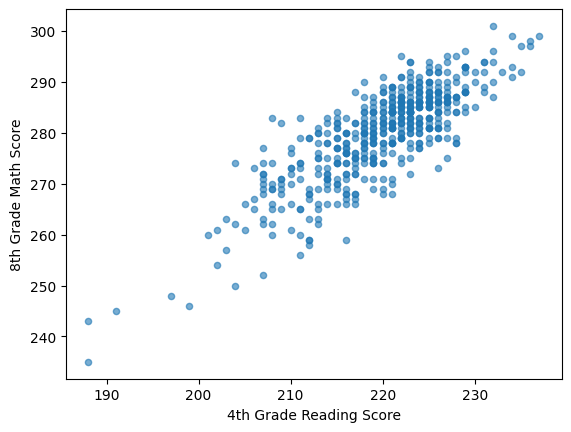

In [18]:
import matplotlib.pyplot as plt

df = pd.read_csv("states_edu.csv")
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('4th Grade Reading Score')
plt.ylabel('8th Grade Math Score')


**4th grade reading score impacts 8th grade math score directly**

**Visualization 2**

   YEAR  TOTAL_EXPENDITURE  ENROLL expenditure_per_student
0  1992          2653798.0     NaN                    None
1  1992           972488.0     NaN                    None
2  1992          3401580.0     NaN                    None
3  1992          1743022.0     NaN                    None
4  1992         27138832.0     NaN                    None


C:\Users\86076\AppData\Local\Temp\ipykernel_41480\3807702669.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows['expenditure_per_student'] = valid_rows['TOTAL_EXPENDITURE'] / valid_rows['ENROLL']


Text(0, 0.5, '8th Grade Math Score')

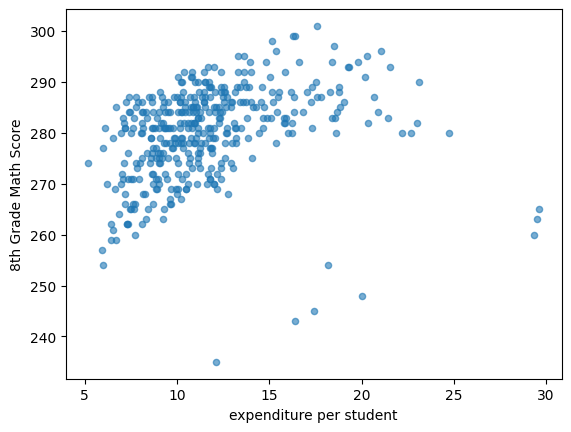

In [19]:
import matplotlib.pyplot as plt
df = pd.read_csv("states_edu.csv")
valid_rows = df.dropna(subset=['ENROLL', 'TOTAL_EXPENDITURE'])

valid_rows['expenditure_per_student'] = valid_rows['TOTAL_EXPENDITURE'] / valid_rows['ENROLL']

df['expenditure_per_student'] = None
df.loc[valid_rows.index, 'expenditure_per_student'] = valid_rows['expenditure_per_student']

print(df[['YEAR', 'TOTAL_EXPENDITURE', 'ENROLL', 'expenditure_per_student']].head())

df.plot.scatter(x='expenditure_per_student', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('expenditure per student')
plt.ylabel('8th Grade Math Score')

**Here we go! except for the few outliers, there is a positive linear relationship between amount spend on student and the 8th grade math score**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv("states_edu.csv")
valid_rows = df.dropna(subset=['ENROLL', 'TOTAL_EXPENDITURE'])

valid_rows['expenditure_per_student'] = valid_rows['TOTAL_EXPENDITURE'] / valid_rows['ENROLL']

df['expenditure_per_student'] = None
df.loc[valid_rows.index, 'expenditure_per_student'] = valid_rows['expenditure_per_student']

X = df[['expenditure_per_student', 'AVG_READING_4_SCORE', 'AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index, 'AVG_MATH_8_SCORE']
y.fillna(y.median(), inplace=True)


C:\Users\86076\AppData\Local\Temp\ipykernel_41480\2891005412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows['expenditure_per_student'] = valid_rows['TOTAL_EXPENDITURE'] / valid_rows['ENROLL']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

Mean Absolute Error (MAE): 2.568010557401121
Mean Squared Error (MSE): 10.858179810090448
Root Mean Squared Error (RMSE): 3.295175232076505
R-squared (R²) Score: 0.834920295899272


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

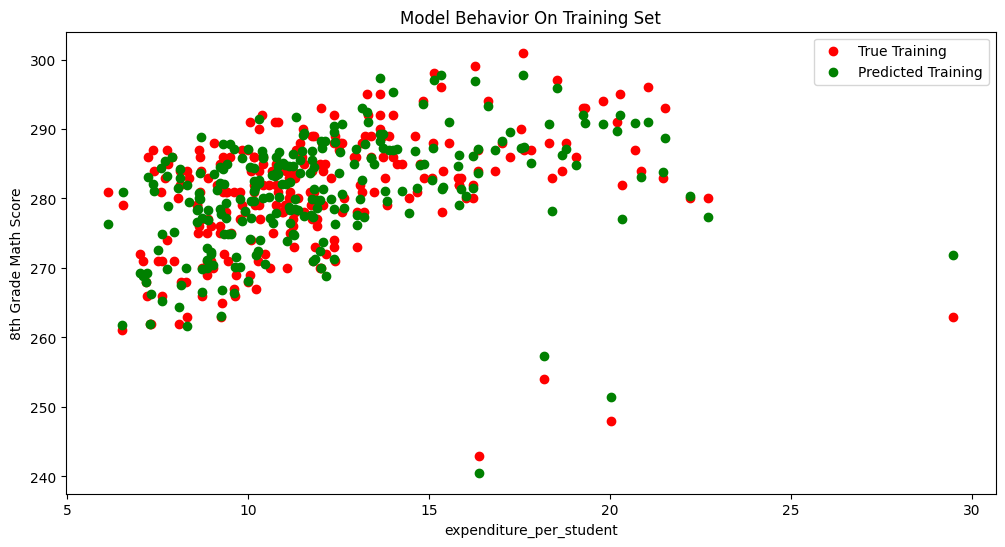

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
col_name = 'expenditure_per_student'

f = plt.figure(figsize=(12, 6))
plt.scatter(X_train[col_name], y_train, color="red")
plt.scatter(X_train[col_name], model.predict(X_train), color="green")

plt.legend(['True Training', 'Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')
plt.title("Model Behavior On Training Set")
plt.show()

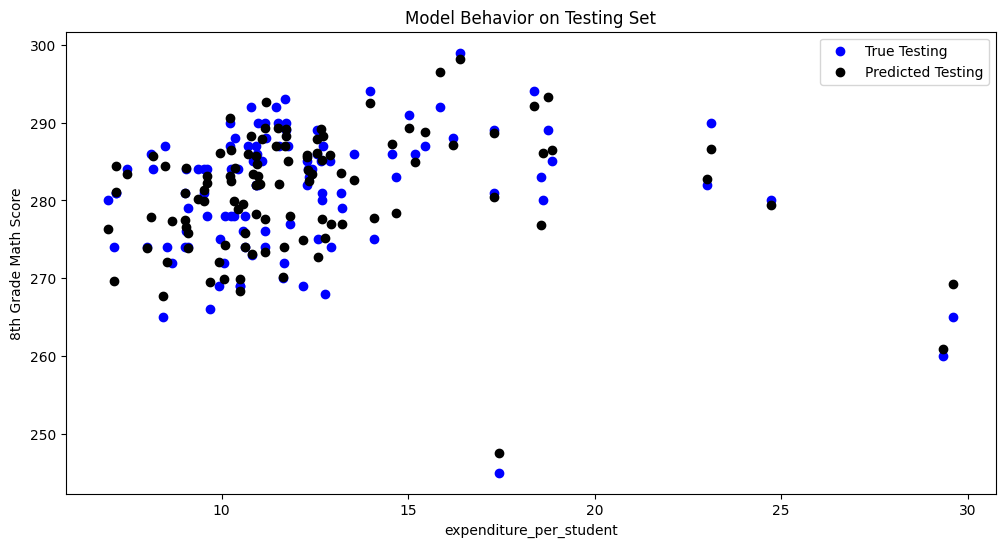

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
col_name = 'expenditure_per_student'

f = plt.figure(figsize=(12, 6))
plt.scatter(X_test[col_name], y_test, color="blue")
plt.scatter(X_test[col_name], model.predict(X_test), color="black")

plt.legend(['True Testing', 'Predicted Testing'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')
plt.title("Model Behavior on Testing Set")
plt.show()